In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu
df = pd.read_csv('exam.csv')
df.head()

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   20 non-null     float64
 1   pass    20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 452.0 bytes


In [5]:
df.describe()

,hours,pass
count,20.000000,20.000000
mean,2.787500,0.500000
std,1.507165,0.512989
min,0.500000,0.000000
25%,1.687500,0.000000
50%,2.625000,0.500000
75%,4.062500,1.000000
max,5.500000,1.000000


In [6]:
X = df[['hours']]
y = df['pass']

In [7]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
X_train.shape, y_train.shape

((14, 1), (14,))

In [27]:
X_test.shape, y_test.shape

((6, 1), (6,))

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
# Tính toán xác suất của lớp cho tập dữ liệu
yhat_train_proba = model.predict_proba(X_train)
yhat_train_proba

array([[0.82661544, 0.17338456],
       [0.43147024, 0.56852976],
       [0.86108771, 0.13891229],
       [0.91288699, 0.08711301],
       [0.82661544, 0.17338456],
       [0.30983146, 0.69016854],
       [0.68443938, 0.31556062],
       [0.7857174 , 0.2142826 ],
       [0.20982849, 0.79017151],
       [0.56197886, 0.43802114],
       [0.88962141, 0.11037859],
       [0.94656927, 0.05343073],
       [0.25665387, 0.74334613],
       [0.49666779, 0.50333221]])

In [35]:
yhat_test_proba = model.predict_proba(X_test)
yhat_test_proba

array([[0.13575415, 0.86424585],
       [0.93162556, 0.06837444],
       [0.08501625, 0.91498375],
       [0.73822733, 0.26177267],
       [0.62521034, 0.37478966],
       [0.16959706, 0.83040294]])

In [37]:
yhat_test = model.predict(X_test)
yhat_test

array([1, 0, 1, 0, 0, 1], dtype=int64)

In [40]:
model.score(X_test,y_test)

0.6666666666666666

In [41]:
model.score(X_train,y_train)

0.8571428571428571

In [45]:
from scipy.stats import linregress

In [47]:
info = linregress(X['hours'],y)
info

LinregressResult(slope=0.23459561219317931, intercept=-0.1539352689884873, rvalue=0.689243146277994, pvalue=0.0007751131598569146, stderr=0.058125622469009215, intercept_stderr=0.18314760130152624)

In [49]:
import math

In [51]:
# hours = 4, pass = ?
p = 1/(1+math.exp(-(info.intercept + info.slope*4)))
p

0.6866377906186065

In [56]:
X_new = np.linspace(0,6,1000).reshape(-1,1)
X_new[:5]

array([[0.        ],
       [0.00600601],
       [0.01201201],
       [0.01801802],
       [0.02402402]])

In [58]:
X_new[-6:-1]

array([[5.96996997],
       [5.97597598],
       [5.98198198],
       [5.98798799],
       [5.99399399]])

In [60]:
yhat_proba = model.predict_proba(X_new)

c:\Users\NK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [62]:
yhat_proba[:5]

array([[0.96768923, 0.03231077],
       [0.96749145, 0.03250855],
       [0.9672925 , 0.0327075 ],
       [0.96709237, 0.03290763],
       [0.96689106, 0.03310894]])

In [64]:
yhat_proba[-6:-1]

array([[0.05367791, 0.94632209],
       [0.05335844, 0.94664156],
       [0.05304076, 0.94695924],
       [0.05272487, 0.94727513],
       [0.05241076, 0.94758924]])

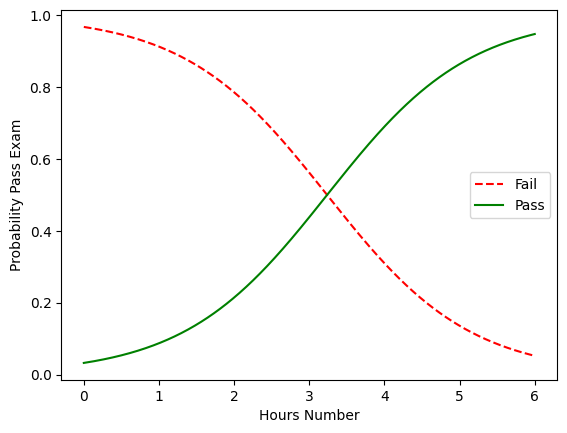

In [69]:
plt.plot(X_new,yhat_proba[:,0],'r--',label ='Fail')
plt.plot(X_new,yhat_proba[:,1],'g-',label = 'Pass')
plt.xlabel('Hours Number')
plt.ylabel('Probability Pass Exam')
plt.legend()
plt.show()